In [1]:
import numpy as np
import matplotlib.pyplot as plt

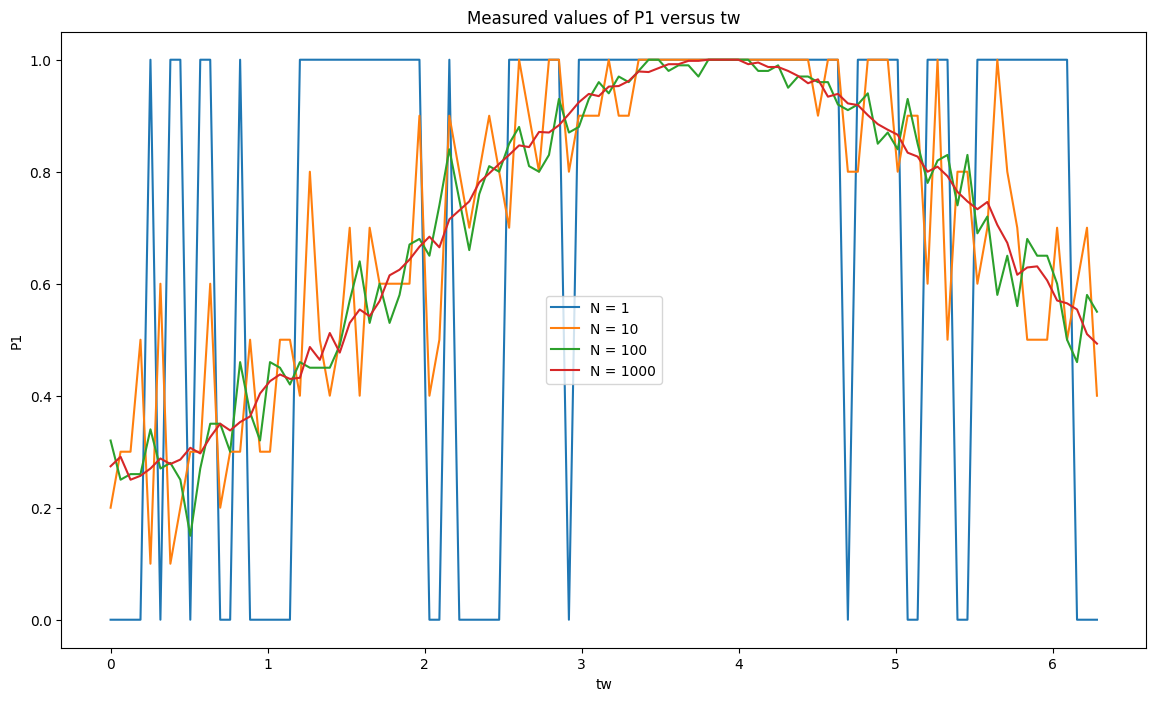

In [4]:
Omega = 2 * np.pi 
delta = np.pi / 4 
Omega_prime = np.sqrt(Omega**2 + delta**2)
tp = np.pi 

# P1 for the qubit in state |1>
def probability_p1(tp, tw, Omega, delta, Omega_prime):
    return 1 - (Omega**2 / Omega_prime**4) * (
        (Omega_prime * np.cos(delta * tw / 2) * np.sin(Omega_prime * tp)) - 
        2 * delta * np.sin(delta * tw / 2) * np.sin(Omega * tp / 2)**2
    )**2

# function to simulate the binomial distribution for P1
def simulate_p1(tp, tw, Omega, delta, Omega_prime, N):
    p1 = probability_p1(tp, tw, Omega, delta, Omega_prime)
    # Generate data from a binomial distribution
    data = np.random.binomial(n=N, p=p1) / N  # to get the probability estimate from N trials
    return data

N_values = [1, 10, 100, 1000]

tw_values = np.linspace(0, 2 * np.pi, 100)  # tw will vary from 0 to 2*pi

# initialize a dictionary to hold the simulated data for each N
simulated_data = {N: [] for N in N_values}

# generate the simulated data for each N and tw value
for N in N_values:
    for tw in tw_values:
        simulated_data[N].append(simulate_p1(tp, tw, Omega, delta, Omega_prime, N))

plt.figure(figsize=(14, 8))

for N in N_values:
    plt.plot(tw_values, simulated_data[N], label=f'N = {N}')

plt.title('Measured values of P1 versus tw')
plt.xlabel('tw')
plt.ylabel('P1')
plt.legend()
plt.show()
